The global car rental industry is expected to reach an estimated $120 billion by 2025 with a CAGR of 6.1% from 2020 to 2025.
<br>
The future of the global car rental industry looks promising with opportunities in business and leisure travel industry. The major drivers for this market are the growing global tourism industry, an increase in international air travelers, and rising income levels across the globe.

# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly_express as px
import plotly.graph_objects as go
sns.set()
from pandas.io.json import json_normalize 

In [2]:
df1 = pd.read_csv('./car rental turo.csv')
df1.drop("Unnamed: 0", axis=1, inplace=True)
df1.head()

,rating,renterTripsTaken,reviewCount,responseRate,newListing,freeDeliveryPromotion,instantBookDisplayed,averageDailyPrice,scalar,city,longitude,latitude,state,model,make,id,listingCreatedTime,year,type,automaticTransmission
0,NaN,0,0,0.0,False,False,False,29.0,11,Iowa Falls,-93.265547,42.522726,IA,Fusion,Ford,58905,1406583813000,2014,car,True
1,5.00,1,1,100.0,False,False,True,162.0,8,Marshall,-95.789869,44.433663,MN,718 Boxster,Porsche,403202,1523137713000,2017,car,True
2,NaN,0,0,NaN,False,False,True,40.0,5,Colliers,-80.559747,40.351722,WV,Cruze,Chevrolet,320436,1505356047000,2014,car,True
3,3.75,4,5,100.0,False,False,True,99.0,19,Moon,-80.222071,40.518838,PA,6 Series,BMW,350460,1512018225000,2006,car,True
4,NaN,0,0,NaN,False,False,False,81.0,17,Pittsburgh,-80.241361,40.495285,PA,Explorer,Ford,429146,1527170872000,2017,suv,True


I will clarify certain features to ensure their meaning is clear, although not all features will be addressed.<br>
<br>
*Response Rate*: The Response Rate indicates the percentage of times a host responded to a rental request on average. If there was no available data, it was assumed to be 0 percent.<br>
*Make, Model, Year*: These details refer to the car's manufacturer, model, and the year it was produced.<br>
*Renter Trips Taken*: This indicates the number of times the car has been rented by a particular renter.<br>
*Scalar*: The distance covered during the rental period.<br>
*Instant Book Displayed*: This denotes whether a renter could instantly book the car without any processing time.<br>
*Average Daily Price*: The cost of renting a specific car per day. This is our response variable.

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36279 entries, 0 to 36278
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rating                 21060 non-null  float64
 1   renterTripsTaken       36279 non-null  int64  
 2   reviewCount            36279 non-null  int64  
 3   responseRate           27845 non-null  float64
 4   newListing             36279 non-null  bool   
 5   freeDeliveryPromotion  36279 non-null  bool   
 6   instantBookDisplayed   36279 non-null  bool   
 7   averageDailyPrice      36279 non-null  float64
 8   scalar                 36279 non-null  int64  
 9   city                   36279 non-null  object 
 10  longitude              36279 non-null  float64
 11  latitude               36279 non-null  float64
 12  state                  36279 non-null  object 
 13  model                  36279 non-null  object 
 14  make                   36279 non-null  object 
 15  id

In [4]:
print(df1.isnull().sum())

rating                   15219
renterTripsTaken             0
reviewCount                  0
responseRate              8434
newListing                   0
freeDeliveryPromotion        0
instantBookDisplayed         0
averageDailyPrice            0
scalar                       0
city                         0
longitude                    0
latitude                     0
state                        0
model                        0
make                         0
id                           0
listingCreatedTime           0
year                         0
type                         0
automaticTransmission        0
dtype: int64


In [5]:
df1.describe()

,rating,renterTripsTaken,reviewCount,responseRate,averageDailyPrice,scalar,longitude,latitude,id,listingCreatedTime,year
count,21060.000000,36279.000000,36279.000000,27845.000000,36279.000000,36279.000000,36279.000000,36279.000000,36279.000000,3.627900e+04,36279.000000
mean,4.873181,11.040823,9.230106,93.093949,98.566471,8.932440,-100.096052,35.486798,337069.431159,1.507230e+12,2013.331183
std,0.345961,22.486039,17.798101,18.915971,112.602460,5.517703,20.349432,5.989925,97410.559293,2.417992e+10,5.018643
min,1.000000,0.000000,0.000000,0.000000,10.000000,0.000000,-159.529084,19.138559,92.000000,1.354648e+12,1927.000000
25%,4.878000,0.000000,0.000000,97.000000,39.000000,5.000000,-118.333673,32.879086,272343.000000,1.496634e+12,2012.000000
50%,5.000000,2.000000,2.000000,100.000000,64.000000,8.000000,-96.926563,34.231217,361421.000000,1.515088e+12,2014.000000
75%,5.000000,11.000000,10.000000,100.000000,110.000000,13.000000,-81.349560,39.762849,418924.000000,1.525789e+12,2016.000000
max,5.000000,450.000000,233.000000,100.000000,1999.000000,20.000000,-68.360588,64.897547,457200.000000,1.531014e+12,2019.000000


**Numerical vs. Categorical Data:** numerical data is quantitative data that can be counted and has a finite number of possible values or data which may be divided into groups e.g. days in a week, number of months in a year, sex (Male/Female/Others), Grades (High/Medium/Low), etc.

In [6]:
print("Number of Categories in: ")
for ColName in df1[['year','city','state','make','model','type']]:
    print("{} = {}".format(ColName,len(df1[ColName].unique())))

Number of Categories in: 
year = 65
city = 2915
state = 50
make = 58
model = 837
type = 5


Using the value_counts() Method to Identify Categories and Types and as well as the frequency of categorical data<br>

In [7]:
#Question: What is the most type of vehicle ?
df1["type"].value_counts()

car        24111
suv         9259
truck       1462
minivan     1347
van          100
Name: type, dtype: int64

In [8]:
#2- What is the most model of vehicle ?
(df1["model"].value_counts()).head(5)

3 Series    851
Wrangler    770
C-Class     750
Prius       713
Corolla     696
Name: model, dtype: int64

In [9]:
#3- What is the most make of vehicle ?
(df1["make"].value_counts()).head(5)

Toyota           4022
BMW              3120
Mercedes-Benz    2728
Chevrolet        2702
Ford             2685
Name: make, dtype: int64

In [10]:
#4- Which city have most of vehicle ?
(df1["city"].value_counts()).head(5)

Los Angeles      2874
Miami             894
Las Vegas         744
Orlando           567
San Francisco     538
Name: city, dtype: int64

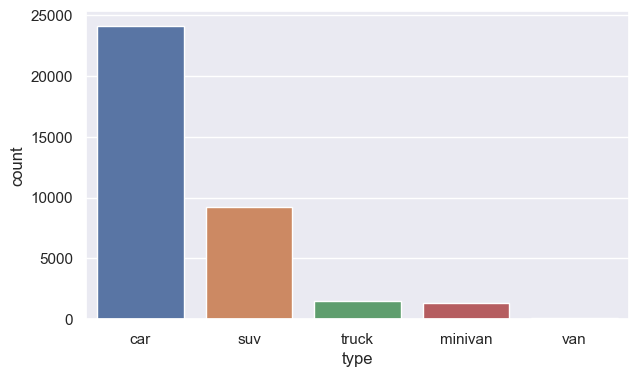

<Figure size 640x480 with 0 Axes>

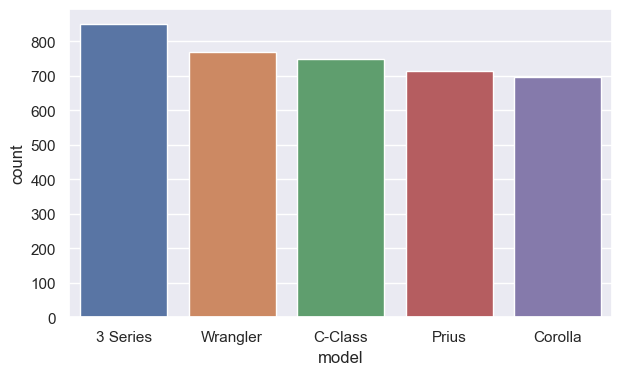

<Figure size 640x480 with 0 Axes>

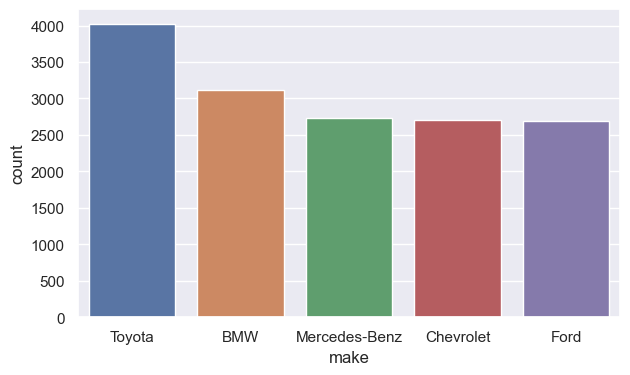

<Figure size 640x480 with 0 Axes>

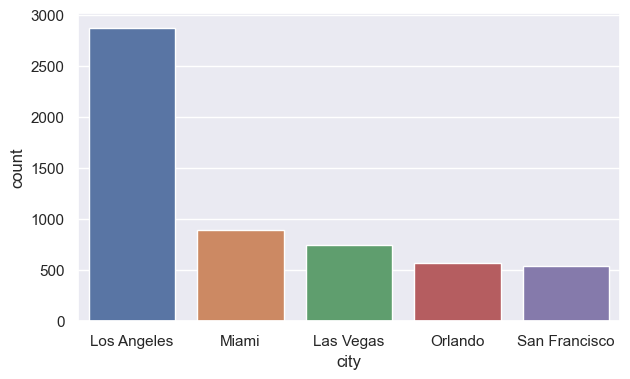

<Figure size 640x480 with 0 Axes>

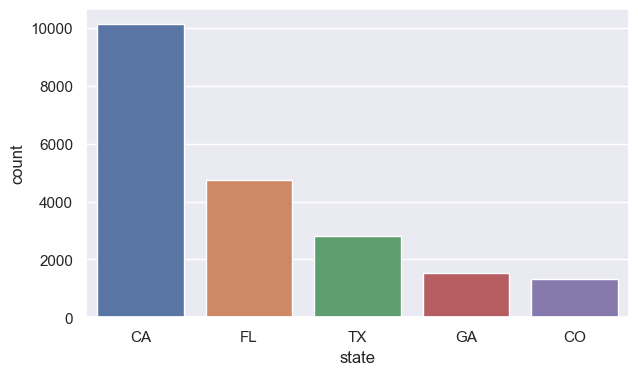

<Figure size 640x480 with 0 Axes>

In [11]:
l= ['type', 'model', 'make', 'city', 'state']


for i in l:
    la=df1[i].value_counts().index
    la=la[0:5]
    f, ax = plt.subplots(figsize=(7, 4))
    sns.countplot(x= i, data= df1, order= la )
    plt.figure()

In [12]:
#Which car have a max daily rental price?

print(df1[df1.averageDailyPrice == df1.averageDailyPrice.max()])

       rating  renterTripsTaken  reviewCount  responseRate  newListing  \
13185     NaN                 0            0         100.0       False   

       freeDeliveryPromotion  instantBookDisplayed  averageDailyPrice  scalar  \
13185                  False                  True             1999.0      10   

        city  longitude   latitude state       model     make      id  \
13185  Elkin -80.841136  36.272507    NC  718 Cayman  Porsche  372036   

       listingCreatedTime  year type  automaticTransmission  
13185       1516988571000  2017  car                   True  


*Discover and Visualize the Data to Gain Insights*

from a quick view of the database, renter trips taken it seems to be very similar to Number of review counts. Let's check it with a simple scatterplot: as you can see below the relationship is almost perfectly linear, which tells me that they are almost a perfect match. I do not think that the variable provides additional information that trips taken . We will drop reviewcount column

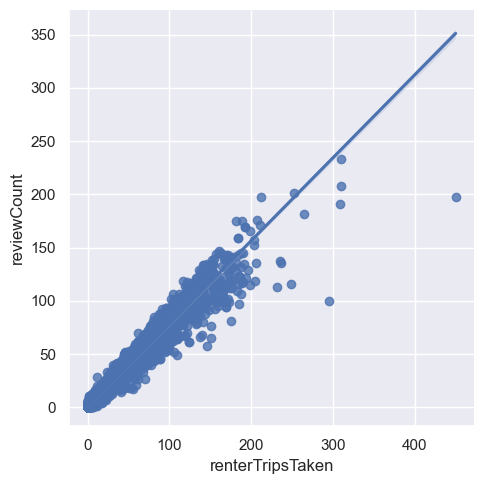

In [13]:
sns.lmplot(data= df1, x='renterTripsTaken', y='reviewCount')

<AxesSubplot:xlabel='listingCreatedTime', ylabel='averageDailyPrice'>

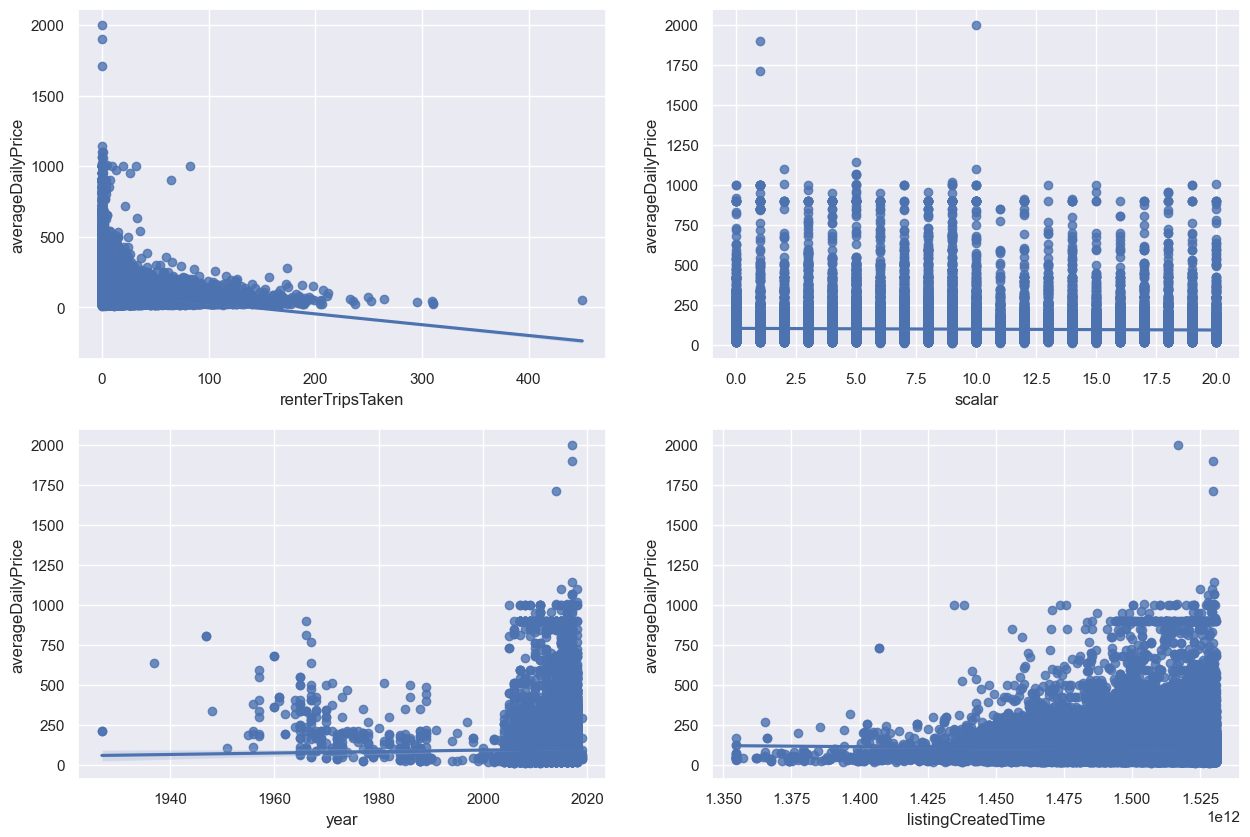

In [14]:
# Scatterplot
f, axes = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.regplot(data= df1, x='renterTripsTaken', y='averageDailyPrice')
plt.subplot(222)
sns.regplot(data= df1, x='scalar', y='averageDailyPrice')
plt.subplot(223)
sns.regplot(data= df1, x='year', y='averageDailyPrice')
plt.subplot(224)
sns.regplot(data= df1, x='listingCreatedTime', y='averageDailyPrice')

Histogram of Rental Car Rating

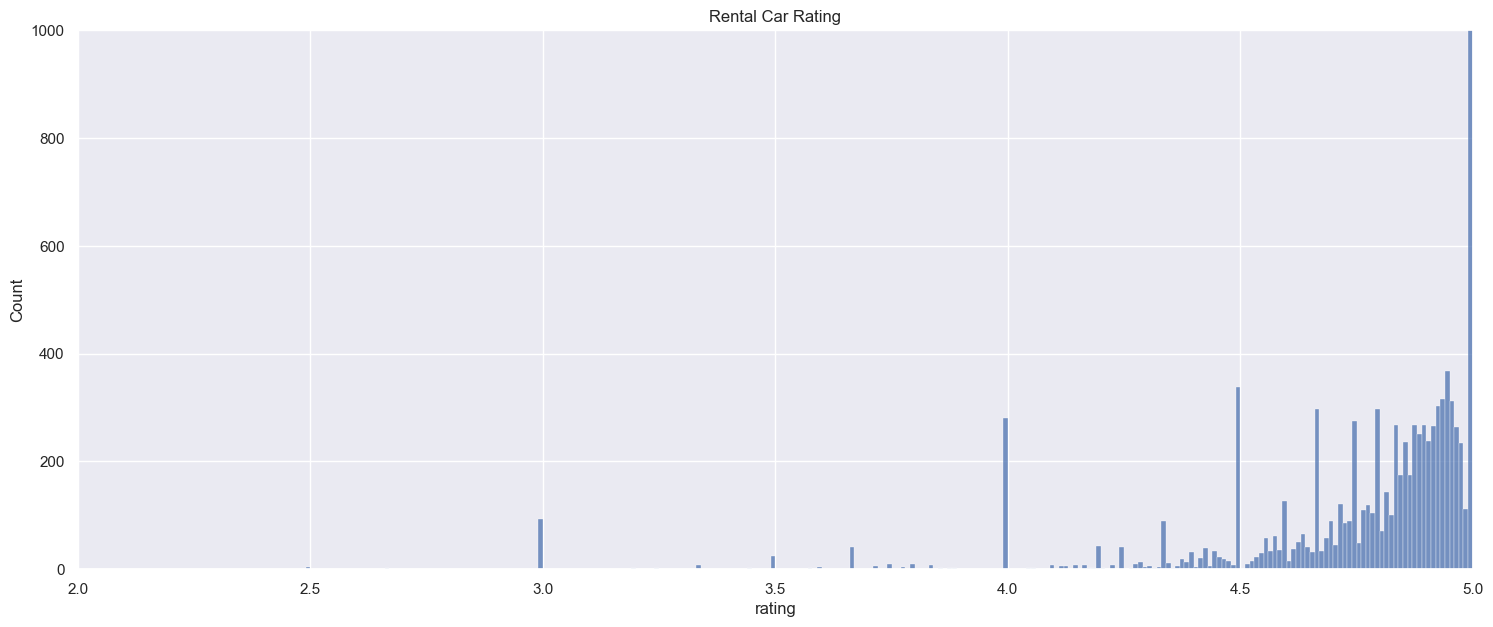

<Figure size 640x480 with 0 Axes>

In [14]:
f, ax = plt.subplots(figsize=(18, 7))
sns.histplot(data=df1, x="rating", binwidth=.01)
ax.set_ylim(0,1000)
ax.set_xlim(2,5)
plt.title('Rental Car Rating')
plt.show()
plt.savefig('Rental Car Rating.png', format='png')

Histogram of vehicle year release

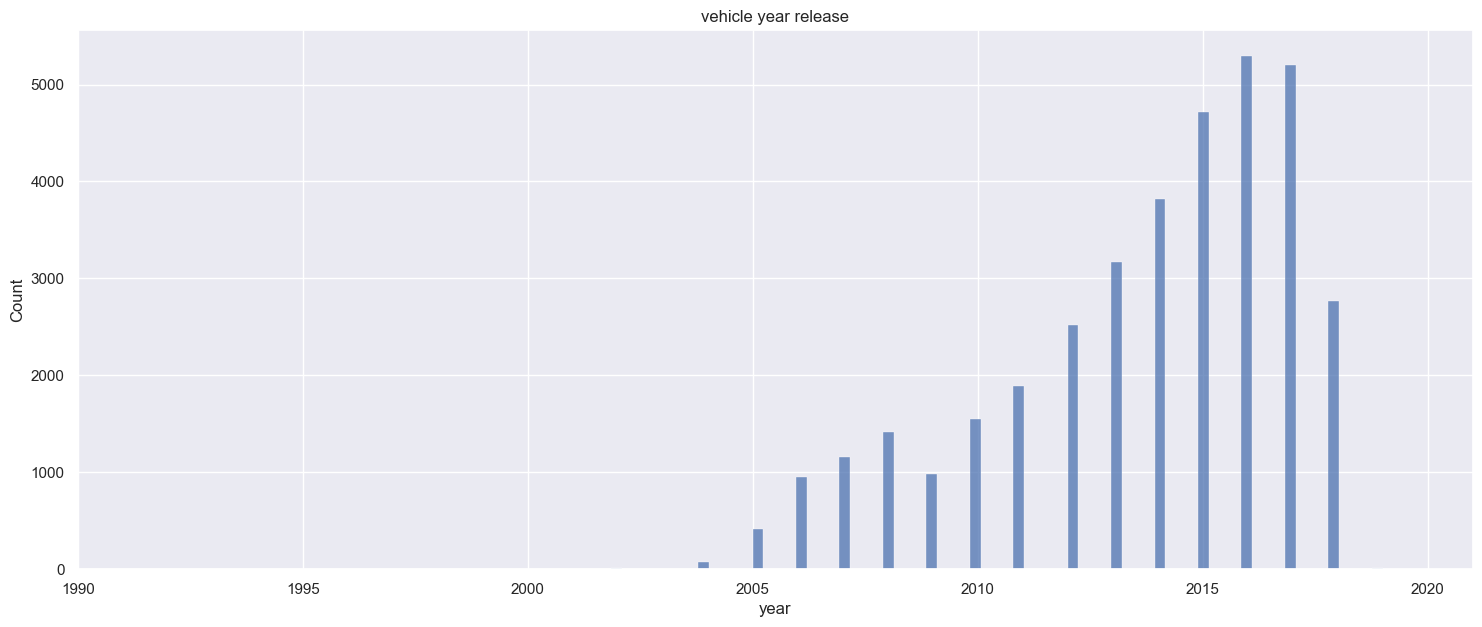

<Figure size 640x480 with 0 Axes>

In [15]:
f, ax = plt.subplots(figsize=(18, 7))
sns.histplot(data=df1, x="year")
ax.set_xlim(1990,2021)
plt.title('vehicle year release')
plt.show()
plt.savefig('vehicle year.png', format='png')

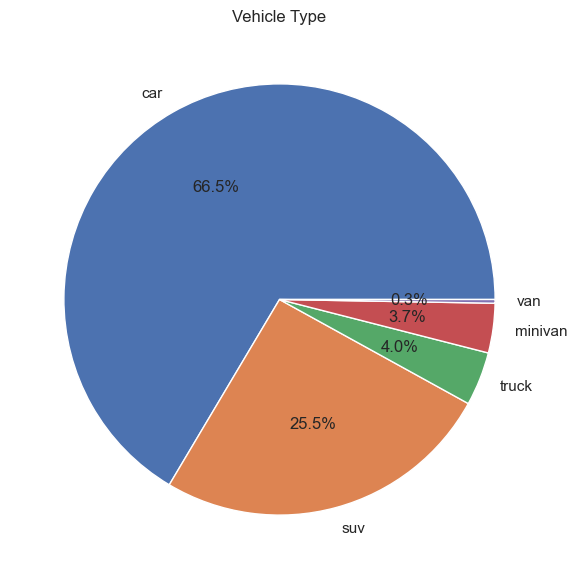

In [16]:
labels=df1['type'].value_counts().index
values=df1['type'].value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values ,labels = labels ,autopct='%1.1f%%')
plt.title('Vehicle Type')
plt.show()
#plt.savefig('Vehicle Type.png', format='png')

*Histogram of vehicle make of Top 25 Most Rented Cars*

Text(0.5, 0, 'make of the vehicle')

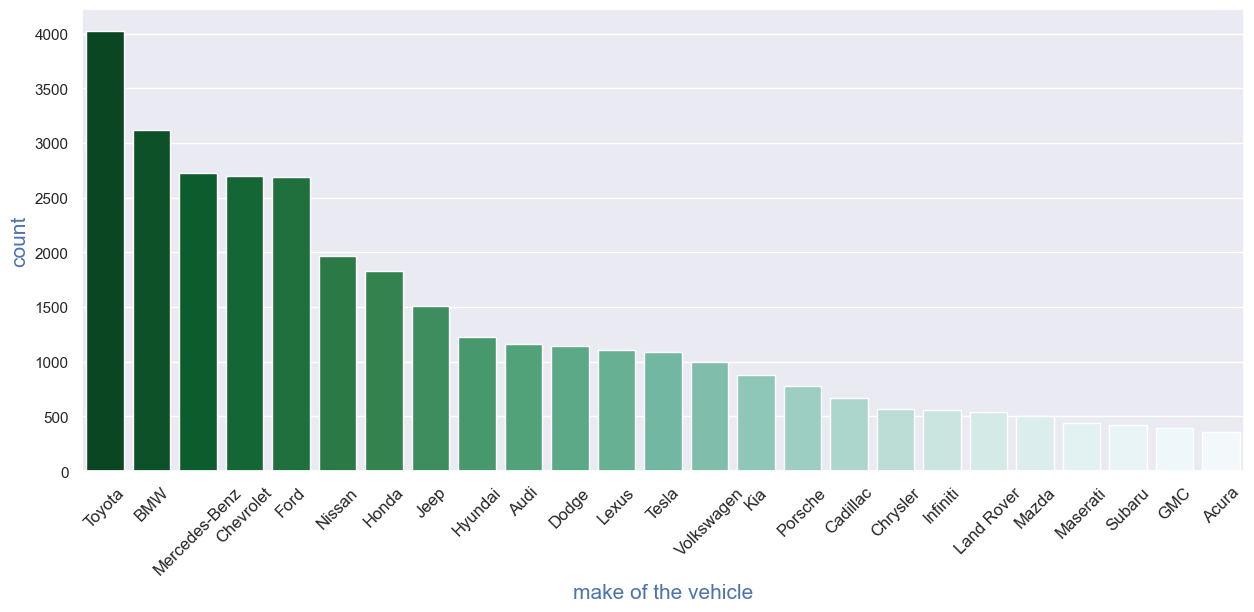

In [17]:
labels=df1['make'].value_counts().index
labels=labels[0:25]
f, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x='make', data=df1,
              order = labels,
              #hue='vehicle.year'
              palette="BuGn_r"
           )
plt.xticks(rotation= 45,fontsize=12 )
ax.set_ylabel('count', fontsize=15, color='b')
ax.set_xlabel('make of the vehicle', fontsize=15, color='b')
#Save plot as svg file format
#plt.savefig('vehicle make.svg', format='svg', dpi=1200)

Histogram of car count per top 30 states locations

Text(0.5, 0, 'states')

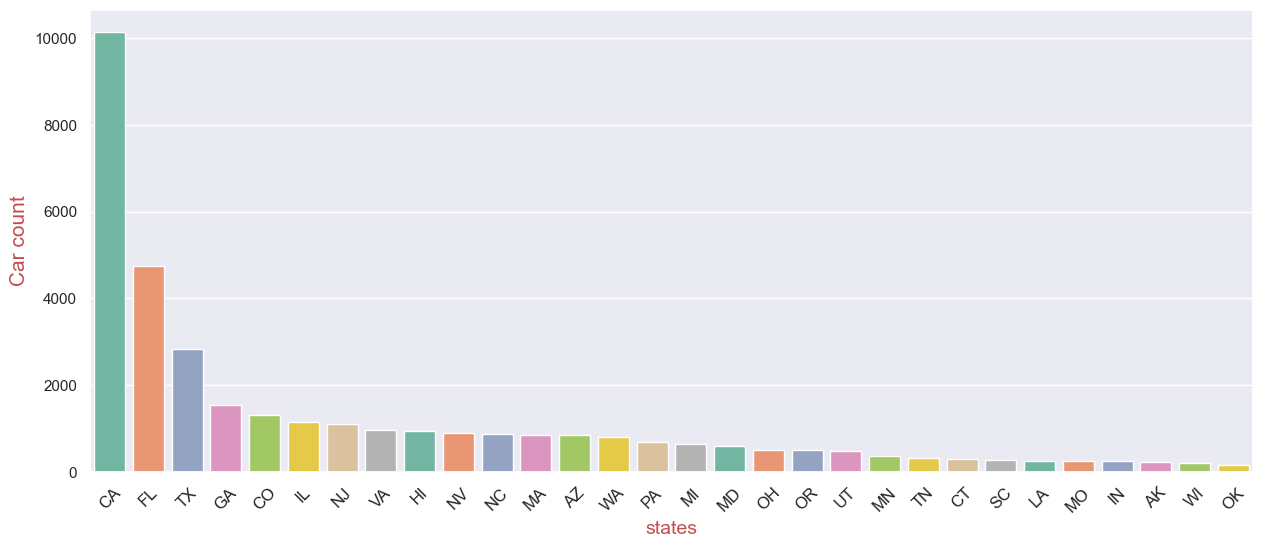

In [18]:
labels=df1['state'].value_counts().index
labels=labels[0:30]
f, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x='state', data=df1,
              order = labels,
              #hue='vehicle.year'
              palette="Set2"
           )
plt.xticks(rotation= 45,fontsize=12 )
ax.set_ylabel('Car count', fontsize=15, color='r')
ax.set_xlabel('states', fontsize=14, color='r')
#Save plot as svg file format
#plt.savefig('Car count per state', format='svg', dpi=1200)

California, Florida,and Texas are top three states.

*Make and Model count of Top 25 Most Rented Cars*

In [19]:
import plotly_express as px
data_make_model = df1.groupby(['make', 'model']).size().reset_index()
data_make_model.rename(columns = {0:'model_count'}, inplace=True)
data_make_model['make_count'] = data_make_model['make'].apply(
    lambda x : data_make_model[data_make_model['make'] == x]['model_count'].sum())
data_make_model.sort_values(by = 'make_count', ascending=False, inplace=True)
fig =px.scatter(data_make_model[data_make_model['make_count'] >45],
             x = 'make', y='model_count', color = 'model',width=1100, height=700,
                title='Make and Model of Top Most Rented Cars')
#fig.show()

Text(0, 0.5, 'daily rate (dollars per day)')

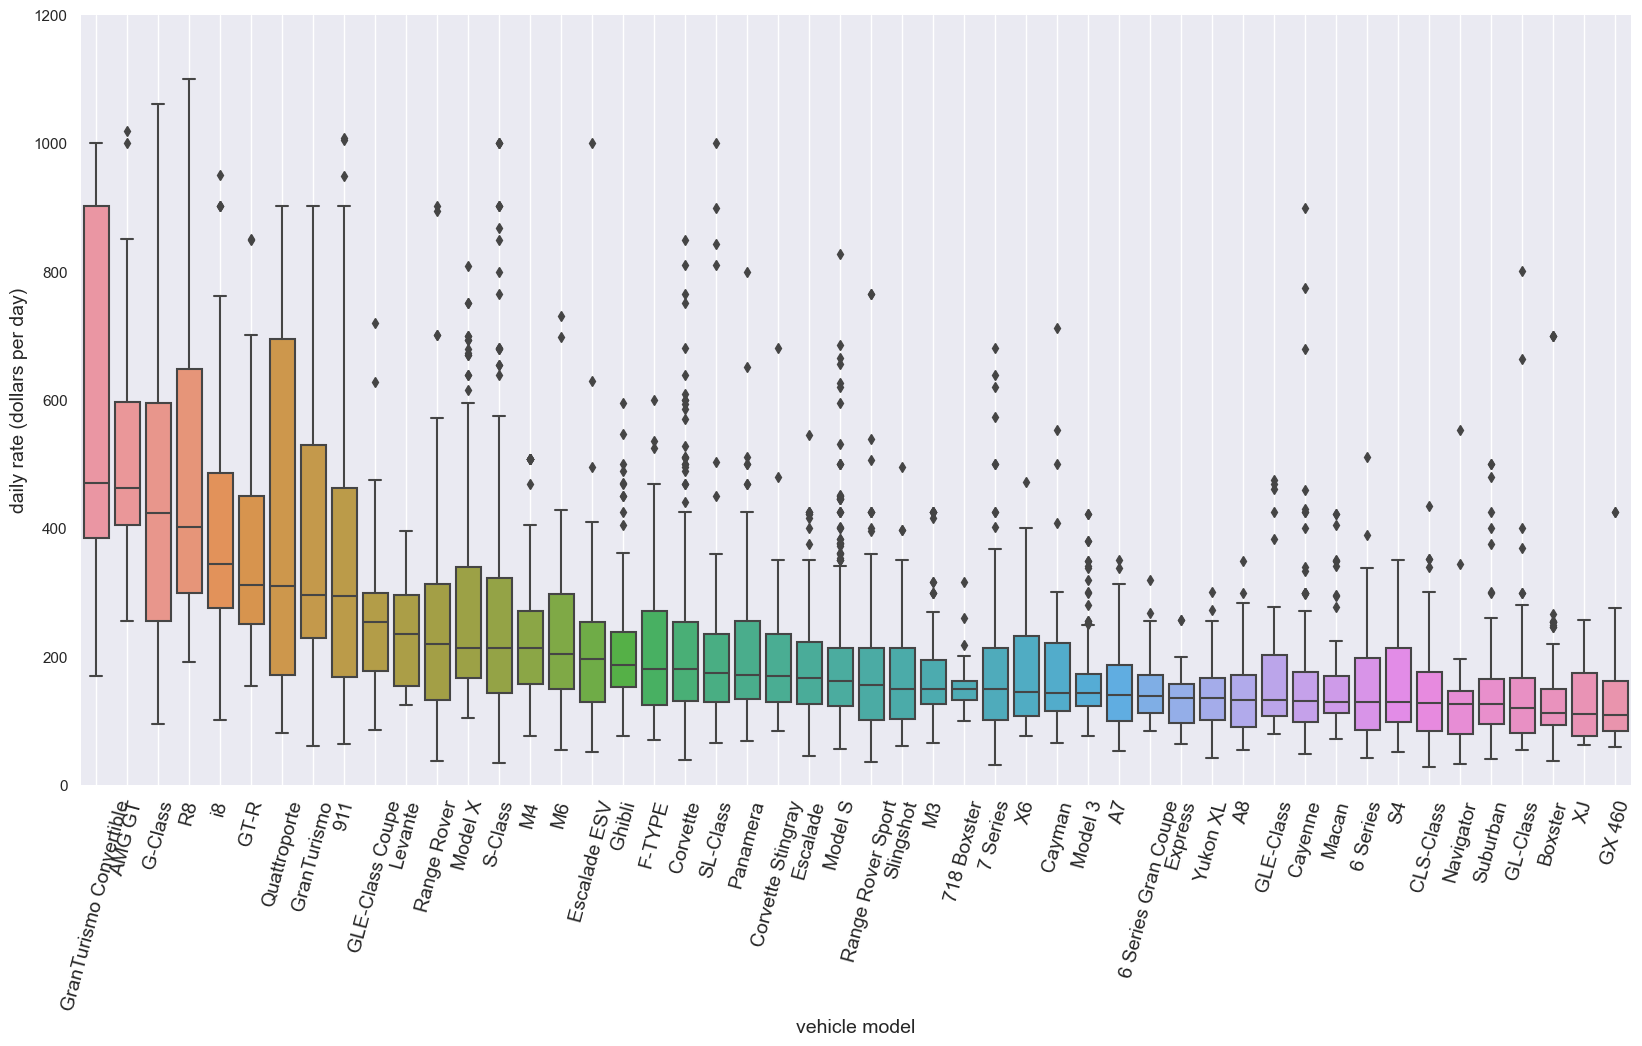

In [20]:
from matplotlib import pyplot
sns.set_context("notebook")
dim = (20.00, 10.00)
fig, ax = pyplot.subplots(figsize=dim)
sns.set(style="white")
# Draw a categorical scatterplot to show each observation
sns.boxplot(y="averageDailyPrice", x="model",  
              data=df1.groupby('model').filter(lambda x: len(x) >= 30),
              order = df1.groupby('model').filter(lambda x: len(x) >= 30)\
                     .groupby(['model']).median()\
                    .sort_values('averageDailyPrice', ascending = False)\
                    .iloc[0:50]
                     .index)

ax.xaxis.grid(True)
ax.yaxis.grid(False)
sns.despine(left=True, bottom=True)

plt.ylim(0, 1200)
plt.xticks(rotation=75, fontsize=14)
ax.set_xlabel('vehicle model', fontsize=14)
ax.set_ylabel('daily rate (dollars per day)', fontsize=14)